<a href="https://colab.research.google.com/github/Ant4114/Spam-Email-Detection-Model/blob/main/Spam_Email_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [12]:
spam=pd.read_csv("/content/emails.csv")

In [13]:
spam.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [14]:
spam.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
spam["Prediction"].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [15]:
x= spam.drop('Email No.',axis=1)
y=spam[['Prediction']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
svm= SVC(random_state=1,C=2,kernel='poly')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy_svm=accuracy_score(y_test,y_pred)
print("Accuracy for svm",accuracy_svm)
cr=classification_report(y_test,y_pred)
print("Classification report for svm",cr)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for svm 0.7594202898550725
Classification report for svm               precision    recall  f1-score   support

           0       0.75      0.99      0.85       739
           1       0.85      0.19      0.31       296

    accuracy                           0.76      1035
   macro avg       0.80      0.59      0.58      1035
weighted avg       0.78      0.76      0.70      1035



confusion matrix is: [[729  10]
 [239  57]]


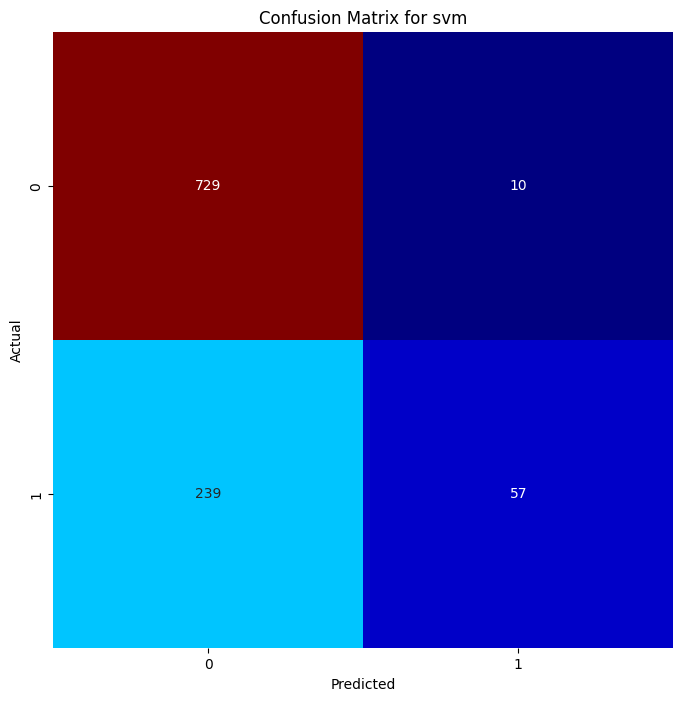

In [19]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix is:",cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='jet',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for svm")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression:", accuracy_logreg)
cr_logreg=classification_report(y_test,y_pred_logreg)
print("Classification report for logistic Regression",cr_logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression: 0.9990338164251208
Classification report for logistic Regression               precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



confusion matrix is: [[738   1]
 [  0 296]]


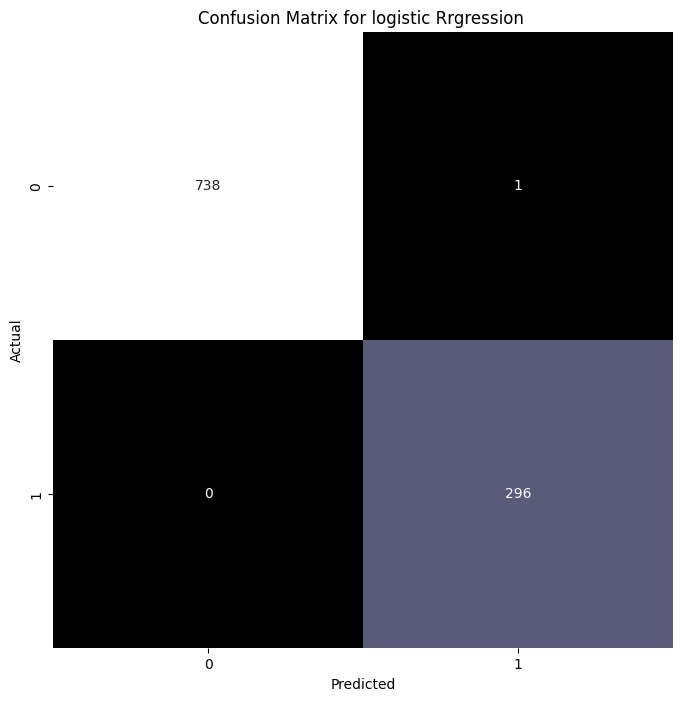

In [21]:
cm=confusion_matrix(y_test,y_pred_logreg)
print("confusion matrix is:",cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='bone',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for logistic Rrgression ")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1,n_estimators=100,criterion='entropy')
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest:", accuracy_rfc)
cr_rfc=classification_report(y_test,y_pred_rfc)
print("Classification report for Random Forest",cr_rfc)


<ipython-input-23-053374d7c52f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy of Random Forest: 0.9971014492753624
Classification report for Random Forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       0.99      1.00      0.99       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



confusion matrix is: [[737   2]
 [  1 295]]


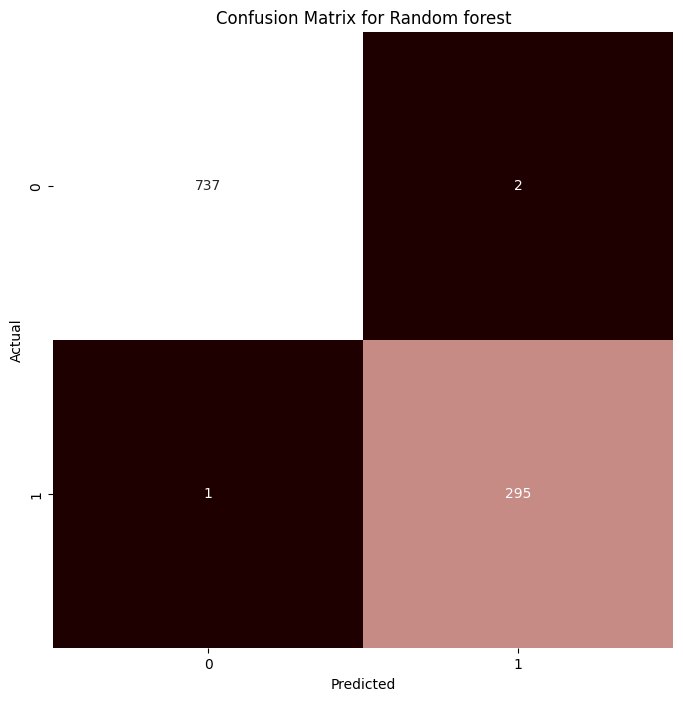

In [24]:
cm=confusion_matrix(y_test,y_pred_rfc)
print("confusion matrix is:",cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='pink',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random forest")
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)
cr_dt=classification_report(y_test,y_pred_dt)
print("Classification report for Decision Tree",cr_dt)


Accuracy of Decision Tree: 1.0
Classification report for Decision Tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



Confusion matrix is: [[739   0]
 [  0 296]]


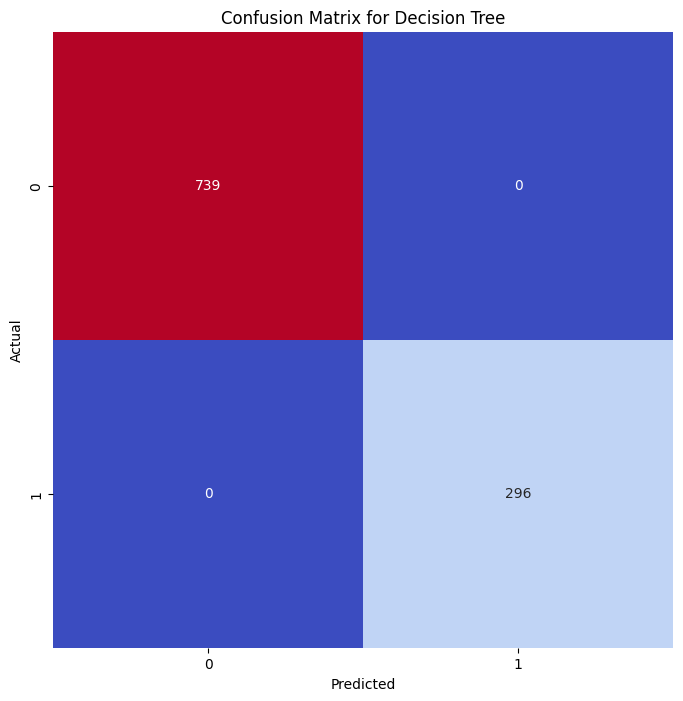

In [26]:
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix is:", cm)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()


<ipython-input-39-c83bd0864ff7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="accuracy", data=df, palette="Set2")


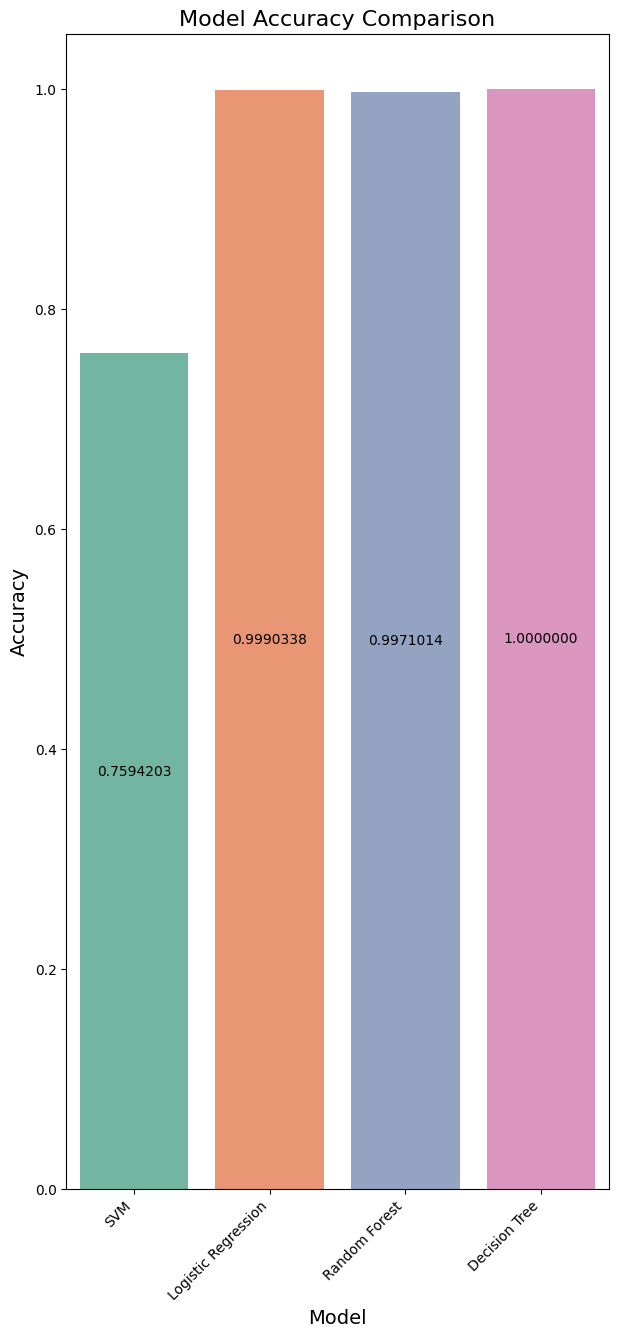

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
models = [
    {
        "model": "SVM",
        "accuracy": accuracy_svm,
    },
    {
        "model": "Logistic Regression",
        "accuracy": accuracy_logreg,
    },
    {
        "model": "Random Forest",
        "accuracy": accuracy_rfc,
    },
    {
        "model": "Decision Tree",
        "accuracy": accuracy_dt,
    },
]

df = pd.DataFrame(models)

fig, ax = plt.subplots(figsize=(7, 15))

sns.barplot(x="model", y="accuracy", data=df, palette="Set2")

ax.set_title("Model Accuracy Comparison", fontsize=16)
ax.set_xlabel("Model", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, fmt="%.7f", label_type="center", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.show()
